Ref:
https://www.archrproject.com/bookdown/creating-an-archrproject-1.html

In [1]:
library(ArchR)
library(tidyverse)


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .______      
          /   \     |   _ 

In [2]:
getwd()

NULL

In [3]:
# before starting a project we must set the ArchRGenome and default threads for parallelization.
# Setting default genome to Hg38.
addArchRGenome("hg38")

Setting default genome to Hg38.



In [4]:
# Setting default number of Parallel threads to 16
addArchRThreads(threads = 10) 

Setting default number of Parallel threads to 10.



## Prepare Arrow files

In [5]:
# Prepare input files
metadata = read.csv('/nfs/team205/heart/anndata_objects/8regions/metadata/HeartTeamSamples_Mappeddata_20221213.csv')
metadata = metadata %>% filter(Publication %in% c('8regions','8regions_revision'))
metadata = metadata %>% filter(modality=='Multiome-ATAC')

ArrowFiles = metadata %>% pull('CombinedID_Multiome')
ArrowFiles = paste0(ArrowFiles,'.arrow')
length(ArrowFiles)
ArrowFiles

[1] 47

[1] "HCAHeart9508627_HCAHeart9508819.arrow"      
 [2] "HCAHeart9508628_HCAHeart9508820.arrow"      
 [3] "HCAHeart9508629_HCAHeart9508821.arrow"      
 [4] "HCAHeart9845431_HCAHeart9917173.arrow"      
 [5] "HCAHeart9845432_HCAHeart9917174.arrow"      
 [6] "HCAHeart9845433_HCAHeart9917175.arrow"      
 [7] "HCAHeart9845434_HCAHeart9917176.arrow"      
 [8] "HCAHeart9845435_HCAHeart9917177.arrow"      
 [9] "HCAHeart9845436_HCAHeart9917178.arrow"      
[10] "HCAHeartST10773165_HCAHeartST10781062.arrow"
[11] "HCAHeartST10773166_HCAHeartST10781063.arrow"
[12] "HCAHeartST10773167_HCAHeartST10781064.arrow"
[13] "HCAHeartST10773168_HCAHeartST10781065.arrow"
[14] "HCAHeartST10773169_HCAHeartST10781446.arrow"
[15] "HCAHeartST10773170_HCAHeartST10781447.arrow"
[16] "HCAHeartST10773171_HCAHeartST10781448.arrow"
[17] "HCAHeartST11064574_HCAHeartST11023239.arrow"
[18] "HCAHeartST11064575_HCAHeartST11023240.arrow"
[19] "HCAHeartST11064576_HCAHeartST11023241.arrow"
[20] "HCAHeartST11064577_HCAHeartST11023242.arrow"
[21] "HCAHeartST11350184_HCAHeartST11121842.arrow"
[22] "HCAHeartST11350186_HCAHeartST11121844.arrow"
[23] "HCAHeartST11350187_HCAHeartST11121845.arrow"
[24] "HCAHeartST11350192_HCAHeartST11445769.arrow"
[25] "HCAHeartST11350193_HCAHeartST11445770.arrow"
[26] "HCAHeartST11350194_HCAHeartST11445771.arrow"
[27] "HCAHeartST11350195_HCAHeartST11445772.arrow"
[28] "HCAHeartST11350196_HCAHeartST11445773.arrow"
[29] "HCAHeartST11350197_HCAHeartST11445774.arrow"
[30] "HCAHeartST11350198_HCAHeartST11445775.arrow"
[31] "HCAHeartST13146201_HCAHeartST13129134.arrow"
[32] "HCAHeartST13146202_HCAHeartST13129135.arrow"
[33] "HCAHeartST13146203_HCAHeartST13129136.arrow"
[34] "HCAHeartST13146204_HCAHeartST13129137.arrow"
[35] "HCAHeartST13146205_HCAHeartST13129138.arrow"
[36] "HCAHeartST13146206_HCAHeartST13129139.arrow"
[37] "HCAHeartST13146207_HCAHeartST13129140.arrow"
[38] "HCAHeartST13146208_HCAHeartST13129141.arrow"
[39] "HCAHeartST13168796_HCAHeartST13167740.arrow"
[40] "HCAHeartST13189995_HCAHeartST13188800.arrow"
[41] "HCAHeartST13189996_HCAHeartST13188801.arrow"
[42] "HCAHeartST13189997_HCAHeartST13188802.arrow"
[43] "HCAHeartST13180615_HCAHeartST13177112.arrow"
[44] "HCAHeartST13180616_HCAHeartST13177113.arrow"
[45] "HCAHeartST13180617_HCAHeartST13177114.arrow"
[46] "HCAHeartST13180618_HCAHeartST13177115.arrow"
[47] "HCAHeartST13180619_HCAHeartST13177116.arrow"

## Create an ArchR Project

In [6]:
proj <- ArchRProject(
  ArrowFiles = ArrowFiles, 
  outputDirectory = "project_output",
  copyArrows = FALSE, #This is recommened so that if you modify the Arrow files you have an original copy for later usage.
    threads = 10
)
# copyArrows = FALSE since copy Arrows will be created when we save project file

Using GeneAnnotation set by addArchRGenome(Hg38)!

Using GeneAnnotation set by addArchRGenome(Hg38)!

Validating Arrows...

Getting SampleNames...



Getting Cell Metadata...



Merging Cell Metadata...

Initializing ArchRProject...


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,-

In [7]:
proj


           ___      .______        ______  __    __  .______      
          /   \     |   _  \      /      ||  |  |  | |   _  \     
         /  ^  \    |  |_)  |    |  ,----'|  |__|  | |  |_)  |    
        /  /_\  \   |      /     |  |     |   __   | |      /     
       /  _____  \  |  |\  \\___ |  `----.|  |  |  | |  |\  \\___.
      /__/     \__\ | _| `._____| \______||__|  |__| | _| `._____|
    



class: ArchRProject 
outputDirectory: /nfs/team205/heart/anndata_objects/8regions/ArchR/project_output 
samples(47): HCAHeart9508627_HCAHeart9508819
  HCAHeart9508628_HCAHeart9508820 ...
  HCAHeartST13180618_HCAHeartST13177115
  HCAHeartST13180619_HCAHeartST13177116
sampleColData names(1): ArrowFiles
cellColData names(15): Sample TSSEnrichment ... DoubletEnrichment
  BlacklistRatio
numberOfCells(1): 260684
medianTSS(1): 8.17
medianFrags(1): 8303

In [8]:
colnames(proj@cellColData)

[1] "Sample"            "TSSEnrichment"     "ReadsInTSS"       
 [4] "ReadsInPromoter"   "ReadsInBlacklist"  "PromoterRatio"    
 [7] "PassQC"            "NucleosomeRatio"   "nMultiFrags"      
[10] "nMonoFrags"        "nFrags"            "nDiFrags"         
[13] "DoubletScore"      "DoubletEnrichment" "BlacklistRatio"

In [9]:
paste0("Memory Size = ", round(object.size(proj) / 10^6, 3), " MB")

[1] "Memory Size = 118.603 MB"

## Plotting

Length of unique values greater than palette, interpolating..

1 




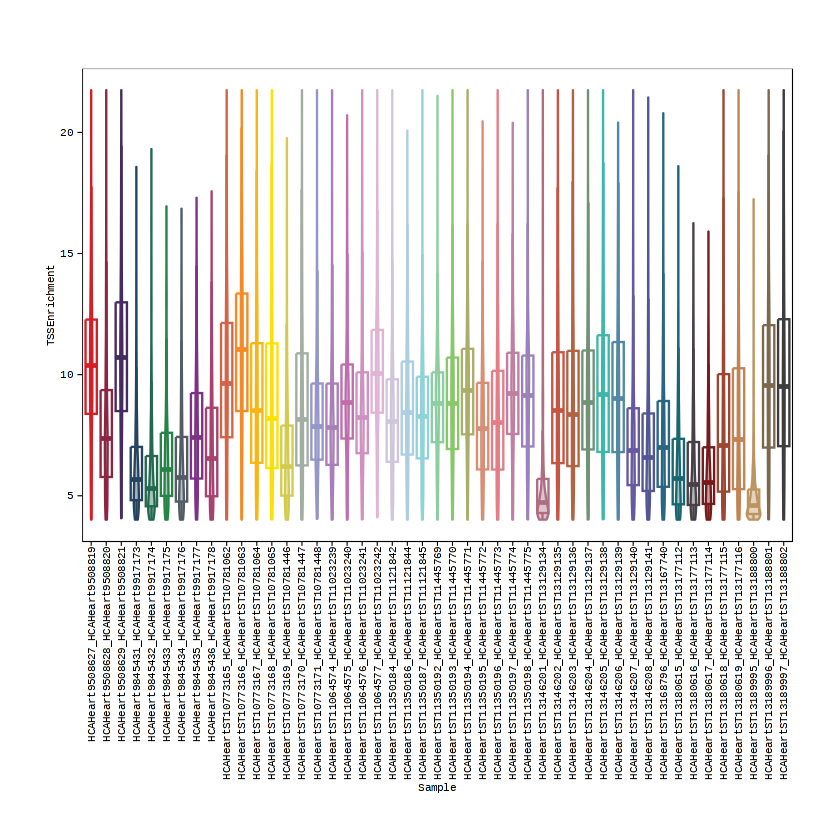

In [10]:
# TSS enrichment score
p1 <- plotGroups(
    ArchRProj = proj, 
    groupBy = "Sample", 
    colorBy = "cellColData", 
    name = "TSSEnrichment",
    plotAs = "violin",
    alpha = 0.4,
    addBoxPlot = TRUE
   )
p1

Length of unique values greater than palette, interpolating..

1 




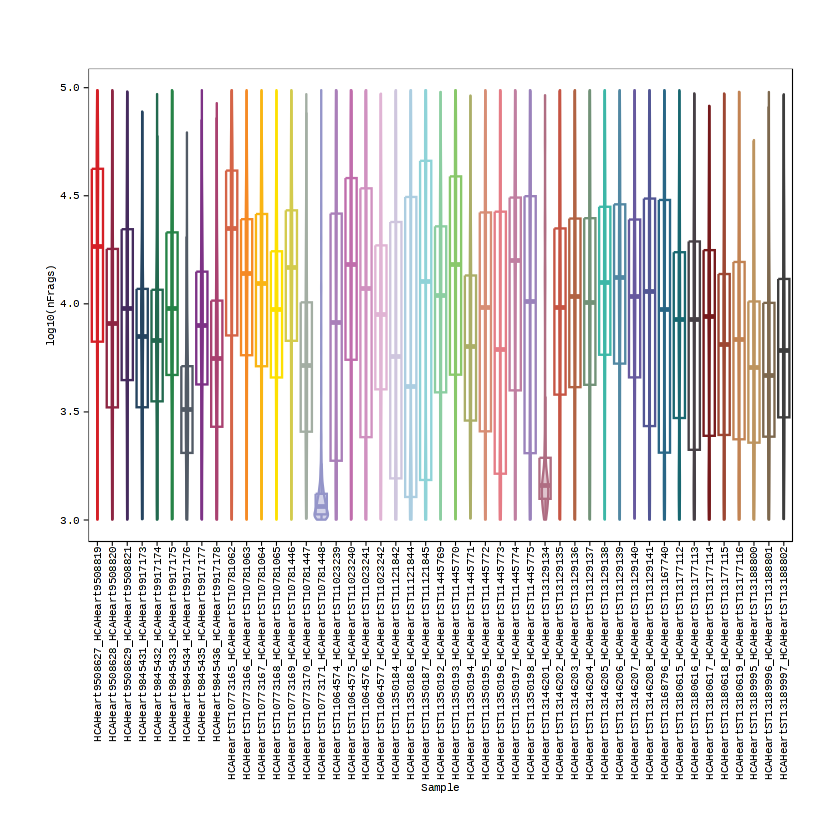

In [11]:
# log10(unique nuclear fragments)
p2 <- plotGroups(
    ArchRProj = proj, 
    groupBy = "Sample", 
    colorBy = "cellColData", 
    name = "log10(nFrags)",
    plotAs = "violin",
    alpha = 0.4,
    addBoxPlot = TRUE
   )
p2

In [12]:
plotPDF(p1,p2, name = "QC-Sample-Statistics.pdf", ArchRProj = proj, addDOC = FALSE, width = 8, height = 5)

Plotting Ggplot!

Plotting Ggplot!



## Identify which samples don't have annotated (QCed) cells

In [10]:
# prepare cells which was annotated
# 8regions, full: original + new dataset
obs = read.csv('/nfs/team205/heart/anndata_objects/8regions/RNA_adult-8reg_full_raw_cellstate-annotated.obs.csv',row.names=1)
obs = obs %>% filter(modality=='Multiome-RNA') %>% select('sangerID','combinedID','donor','donor_type','region',
                                                          'region_finest','age','gender','facility','cell_or_nuclei',
                                                          'modality','kit_10x','flushed','n_genes','n_genes_by_counts',
                                                          'total_counts','total_counts_mt','pct_counts_mt','total_counts_ribo',
                                                          'pct_counts_ribo','scrublet_score','scrublet_leiden','cluster_scrublet_score',
                                                          'doublet_pval','doublet_bh_pval','batch_key','cell_type',
                                                          'cell_state')

head(obs)
table(obs$cell_state)

,sangerID,combinedID,donor,donor_type,region,region_finest,age,gender,facility,cell_or_nuclei,⋯,total_counts_ribo,pct_counts_ribo,scrublet_score,scrublet_leiden,cluster_scrublet_score,doublet_pval,doublet_bh_pval,batch_key,cell_type,cell_state
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
HCAHeart9508627_HCAHeart9508819_TCAATCGCAGTAAAGC-1,HCAHeart9508627,HCAHeart9508627_HCAHeart9508819,D3,DBD,LV,LV,55-60,Male,Sanger,Nuclei,⋯,1010,0.3940879,0.2523962,"6,6",0.2523962,0.06455196,0.7769916,D3_Nuclei_Multiome-v1,Fibroblast,unclassified
HCAHeart9508627_HCAHeart9508819_CTGCTCCCAACTGGCT-1,HCAHeart9508627,HCAHeart9508627_HCAHeart9508819,D3,DBD,LV,LV,55-60,Male,Sanger,Nuclei,⋯,570,0.4180479,0.2087912,"6,0",0.1968504,0.15931894,0.7769916,D3_Nuclei_Multiome-v1,Fibroblast,FB4_activated
HCAHeart9508627_HCAHeart9508819_GTTTCCTCATCATGTG-1,HCAHeart9508627,HCAHeart9508627_HCAHeart9508819,D3,DBD,LV,LV,55-60,Male,Sanger,Nuclei,⋯,509,0.3757151,0.1428571,"9,1",0.1759036,0.21156012,0.7769916,D3_Nuclei_Multiome-v1,Ventricular Cardiomyocyte,vCM3_stressed
HCAHeart9508627_HCAHeart9508819_ATTAGCGGTCGCAAAC-1,HCAHeart9508627,HCAHeart9508627_HCAHeart9508819,D3,DBD,LV,LV,55-60,Male,Sanger,Nuclei,⋯,403,0.4526717,0.2219020,"6,6",0.2523962,0.06455196,0.7769916,D3_Nuclei_Multiome-v1,Fibroblast,unclassified
HCAHeart9508627_HCAHeart9508819_ACTTAGGGTGCGCATG-1,HCAHeart9508627,HCAHeart9508627_HCAHeart9508819,D3,DBD,LV,LV,55-60,Male,Sanger,Nuclei,⋯,307,0.3614827,0.1968504,"9,1",0.1759036,0.21156012,0.7769916,D3_Nuclei_Multiome-v1,Ventricular Cardiomyocyte,vCM3_stressed
HCAHeart9508627_HCAHeart9508819_CAATCCCTCTACCTGC-1,HCAHeart9508627,HCAHeart9508627_HCAHeart9508819,D3,DBD,LV,LV,55-60,Male,Sanger,Nuclei,⋯,221,0.2763571,0.1759036,"9,1",0.1759036,0.21156012,0.7769916,D3_Nuclei_Multiome-v1,Ventricular Cardiomyocyte,vCM3_stressed



            aCM1             aCM2             aCM3             aCM4 
            5004             9083             1462             3388 
           Adip1            Adip2            Adip3  AVN_bundle_cell 
            1535              624               90               38 
      AVN_P_cell                B         B_plasma          CD14+Mo 
             155              329              165              734 
         CD16+Mo        CD4+T_act      CD4+T_naive      CD8+T_cytox 
            1431             1108             1139              148 
        CD8+T_em         CD8+T_te      CD8+T_trans               DC 
             757              496             1002              285 
         EC1_cap    EC10_CMC-like          EC2_cap          EC3_cap 
            3979             3110              895             1176 
      EC4_immune          EC5_art          EC6_ven  EC7_endocardial 
            2087             4560             3799             5834 
          EC8_ln              FB1

## Add fine-grained cell type annotation from RNA data

In [11]:
# change cell names to match with .obs metadata
proj$cellNames_mod = gsub("#", "_", proj$cellNames)
proj$cellNames_mod[1:10]

[1] "HCAHeart9508627_HCAHeart9508819_TTGATGTCATAATCGT-1"
 [2] "HCAHeart9508627_HCAHeart9508819_GATTGGTTCGGCCAGT-1"
 [3] "HCAHeart9508627_HCAHeart9508819_TGTGCAAGTAGGTTGC-1"
 [4] "HCAHeart9508627_HCAHeart9508819_GCAGGCTTCCTAAGGT-1"
 [5] "HCAHeart9508627_HCAHeart9508819_GGTCTTTGTACCGGAT-1"
 [6] "HCAHeart9508627_HCAHeart9508819_GAGGAGGCAATAGTCT-1"
 [7] "HCAHeart9508627_HCAHeart9508819_ATCCTGACACTGGCTG-1"
 [8] "HCAHeart9508627_HCAHeart9508819_GACCTGCAGGCTACAT-1"
 [9] "HCAHeart9508627_HCAHeart9508819_AATCATGTCTGCAAAC-1"
[10] "HCAHeart9508627_HCAHeart9508819_TGTCCTTCAGTCTAAT-1"

In [12]:
# keep cellColData dataframe for later use
cellColData_prefilter = proj@cellColData

# select shared cells between RNA and ATAC
shared_cells = intersect(proj$cellNames_mod, rownames(obs))
length(shared_cells)

# select shared cells fromr the ArchR pobject
idxSample <- BiocGenerics::which(proj$cellNames_mod %in% shared_cells)
cellsSample <- proj$cellNames[idxSample]
proj = proj[cellsSample, ]
proj

# select shared cells fromr the .obs metadata
obs = obs[proj$cellNames_mod, ]
dim(obs)

[1] 144762


           ___      .______        ______  __    __  .______      
          /   \     |   _  \      /      ||  |  |  | |   _  \     
         /  ^  \    |  |_)  |    |  ,----'|  |__|  | |  |_)  |    
        /  /_\  \   |      /     |  |     |   __   | |      /     
       /  _____  \  |  |\  \\___ |  `----.|  |  |  | |  |\  \\___.
      /__/     \__\ | _| `._____| \______||__|  |__| | _| `._____|
    



class: ArchRProject 
outputDirectory: /nfs/team205/heart/anndata_objects/8regions/ArchR/project_output 
samples(47): HCAHeart9508627_HCAHeart9508819
  HCAHeart9508628_HCAHeart9508820 ...
  HCAHeartST13180618_HCAHeartST13177115
  HCAHeartST13180619_HCAHeartST13177116
sampleColData names(1): ArrowFiles
cellColData names(16): Sample TSSEnrichment ... BlacklistRatio
  cellNames_mod
numberOfCells(1): 144762
medianTSS(1): 8.677
medianFrags(1): 9588

[1] 144762     28

In [13]:
length(unique(proj@cellColData$Sample))

[1] 47

In [14]:
# add metadata
for (c in colnames(obs)){
    proj = addCellColData(ArchRProj = proj, data = obs[[c]], cells = proj$cellNames, name = c)
}

In [15]:
proj


           ___      .______        ______  __    __  .______      
          /   \     |   _  \      /      ||  |  |  | |   _  \     
         /  ^  \    |  |_)  |    |  ,----'|  |__|  | |  |_)  |    
        /  /_\  \   |      /     |  |     |   __   | |      /     
       /  _____  \  |  |\  \\___ |  `----.|  |  |  | |  |\  \\___.
      /__/     \__\ | _| `._____| \______||__|  |__| | _| `._____|
    



class: ArchRProject 
outputDirectory: /nfs/team205/heart/anndata_objects/8regions/ArchR/project_output 
samples(47): HCAHeart9508627_HCAHeart9508819
  HCAHeart9508628_HCAHeart9508820 ...
  HCAHeartST13180618_HCAHeartST13177115
  HCAHeartST13180619_HCAHeartST13177116
sampleColData names(1): ArrowFiles
cellColData names(44): Sample TSSEnrichment ... cell_type cell_state
numberOfCells(1): 144762
medianTSS(1): 8.677
medianFrags(1): 9588

In [16]:
table(proj$cell_state)


            aCM1             aCM2             aCM3             aCM4 
            3443             7420             1021             1993 
           Adip1            Adip2            Adip3  AVN_bundle_cell 
             896              423               55               26 
      AVN_P_cell                B         B_plasma          CD14+Mo 
              91              238              107              467 
         CD16+Mo        CD4+T_act      CD4+T_naive      CD8+T_cytox 
             964              659              683               94 
        CD8+T_em         CD8+T_te      CD8+T_trans               DC 
             475              283              608              189 
         EC1_cap    EC10_CMC-like          EC2_cap          EC3_cap 
            2763             2064              623              783 
      EC4_immune          EC5_art          EC6_ven  EC7_endocardial 
            1571             2980             2482             2838 
          EC8_ln              FB1

## Save project

In [27]:
saveArchRProject(ArchRProj = proj, outputDirectory = "project_output", load = FALSE)

Copying Arrow Files...

Copying Arrow Files (1 of 47)

Copying Arrow Files (2 of 47)

Copying Arrow Files (3 of 47)

Copying Arrow Files (4 of 47)

Copying Arrow Files (5 of 47)

Copying Arrow Files (6 of 47)

Copying Arrow Files (7 of 47)

Copying Arrow Files (8 of 47)

Copying Arrow Files (9 of 47)

Copying Arrow Files (10 of 47)

Copying Arrow Files (11 of 47)

Copying Arrow Files (12 of 47)

Copying Arrow Files (13 of 47)

Copying Arrow Files (14 of 47)

Copying Arrow Files (15 of 47)

Copying Arrow Files (16 of 47)

Copying Arrow Files (17 of 47)

Copying Arrow Files (18 of 47)

Copying Arrow Files (19 of 47)

Copying Arrow Files (20 of 47)

Copying Arrow Files (21 of 47)

Copying Arrow Files (22 of 47)

Copying Arrow Files (23 of 47)

Copying Arrow Files (24 of 47)

Copying Arrow Files (25 of 47)

Copying Arrow Files (26 of 47)

Copying Arrow Files (27 of 47)

Copying Arrow Files (28 of 47)

Copying Arrow Files (29 of 47)

Copying Arrow Files (30 of 47)

Copying Arrow Files (31 o

In [28]:
getwd()

[1] "/nfs/team205/heart/anndata_objects/8regions/ArchR"